In [49]:
%matplotlib inline

import numpy as np
import pylab as pl
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style="ticks", color_codes=True)
import pydotplus 

import warnings
warnings.filterwarnings('ignore')

from IPython.display import Image  
from collections import defaultdict
from sklearn.dummy import DummyClassifier
from sklearn import svm, tree
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize, StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report,confusion_matrix, roc_curve, auc
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier, VotingClassifier
from sklearn.feature_selection import RFE, SelectKBest, chi2, SelectFromModel
from sklearn.linear_model import LogisticRegression, SGDClassifier
from imblearn.over_sampling import SMOTE

Function to get evaluation metrics and roc curve

In [4]:
def get_eval(clf, X_train, y_train,y_test,y_pred):
    # Cross Validation to test and anticipate overfitting problem
    scores1 = cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy')
    scores2 = cross_val_score(clf, X_train, y_train, cv=10, scoring='precision')
    scores3 = cross_val_score(clf, X_train, y_train, cv=10, scoring='roc_auc')
    # The mean score and standard deviation of the score estimate
    print("Cross Validation Accuracy: %0.2f (+/- %0.2f)" % (scores1.mean(), scores1.std()))
    print("Cross Validation Precision: %0.2f (+/- %0.2f)" % (scores2.mean(), scores2.std()))
    print("Cross Validation roc_auc: %0.2f (+/- %0.2f)" % (scores3.mean(), scores3.std()))
    # Create and print confusion matrix
    abclf_cm = confusion_matrix(y_test,y_pred)
    print(abclf_cm)
    return

# Function to get roc curve
def get_roc (y_test,y_pred):
    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    #Plot of a ROC curve
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()
    return

DecisionTreeClassifier

In [5]:
def dectreeclf(X_train, y_train,X_test, y_test):
    print("DecisionTreeClassifier")
    dec_tree = tree.DecisionTreeClassifier(min_samples_split=10,min_samples_leaf=5).fit(X_train, y_train)

    # Predict target variables y for test data
    y_pred = dec_tree.predict(X_test)

    # Export visualization as file
    #visualize_tree(dec_tree,X_train,y_train)
    
    # Get Cross Validation and Confusion matrix
    get_eval(dec_tree, X_train, y_train,y_test,y_pred)
    return

# Visualize tree and save as .pdf
# Only works for dataframes, not for numpy arrays
def visualize_tree(clf,X_train,y_train):
    dot_data = export_graphviz(clf, out_file=None) 
    graph = pydotplus.graph_from_dot_data(dot_data) 
    graph.write_pdf("dectreeclf.pdf") 
     
        
    dot_data = export_graphviz(clf, out_file=None, 
                         feature_names=[str(x) for x in X_train.columns.tolist()], # feature names from X_train column names
                         class_names=[str(x) for x in clf.classes_],
                         filled=True, rounded=True,  
                         special_characters=True,
                         leaves_parallel=True)  
    graph = pydotplus.graph_from_dot_data(dot_data)  
    Image(graph.create_png()) 
    return

Random Forest Classifier

In [6]:
def randomforestclf(X_train, y_train,X_test, y_test):
    print("RandomForestClassifier")
    randomforest = RandomForestClassifier().fit(X_train, y_train)

    # Predict target variables y for test data
    y_pred = randomforest.predict(X_test)

    # Get Cross Validation and Confusion matrix
    get_eval(randomforest, X_train, y_train,y_test,y_pred)
    return

Extra Tree Classifier

In [7]:
def extratreesclf(X_train, y_train,X_test, y_test):
    print("ExtraTreesClassifier")
    extratrees = ExtraTreesClassifier().fit(X_train, y_train)

    # Predict target variables y for test data
    y_pred = extratrees.predict(X_test)

    # Get Cross Validation and Confusion matrix
    get_eval(extratrees, X_train, y_train,y_test,y_pred)
    return

GradientBoostingClassifier

In [8]:
def gradientboostingclf(X_train, y_train, X_test, y_test):  
    print("GradientBoostingClassifier")
    gbclf = GradientBoostingClassifier().fit(X_train, y_train)

    # Predict target variables y for test data
    y_pred = gbclf.predict(X_test)

    # Get Cross Validation and Confusion matrix
    get_eval(gbclf, X_train, y_train,y_test,y_pred)
    return

AdaBoostClassifier

In [9]:
def adaboostclf(X_train, y_train, X_test, y_test):  
    print("AdaBoostClassifier")
    abclf = AdaBoostClassifier().fit(X_train, y_train)

    # Predict target variables y for test data
    y_pred = abclf.predict(X_test)

    # Get Cross Validation and Confusion matrix
    get_eval(abclf, X_train, y_train,y_test,y_pred)
    return

Bagging Classifier

In [10]:
def baggingclf(X_train, y_train, X_test, y_test):  
    print("BaggingClassifier")
    bclf = BaggingClassifier().fit(X_train, y_train)

    # Predict target variables y for test data
    y_pred = bclf.predict(X_test)

    # Get Cross Validation and Confusion matrix
    get_eval(bclf, X_train, y_train,y_test,y_pred)
    return

Logistic Regression

In [11]:
def logregclf(X_train, y_train,X_test, y_test):
    print("LogisticRegression")
    logreg = LogisticRegression().fit(X_train, y_train)

    # Predict target variables y for test data
    y_pred = logreg.predict(X_test)

    # Get Cross Validation and Confusion matrix
    get_eval(logreg, X_train, y_train,y_test,y_pred)
    return

SGDClassifier

In [13]:
def sgdclf(X_train, y_train,X_test, y_test):
    print("SGDClassifier")
    sgd = SGDClassifier().fit(X_train, y_train)

    # Predict target variables y for test data
    y_pred = sgd.predict(X_test)

    # Get Cross Validation and Confusion matrix
    get_eval(sgd, X_train, y_train,y_test,y_pred)
    return

Linear SVC

In [14]:
def linearsvmclf(X_train, y_train, X_test, y_test, C): 
    print("LinearSVC")
    lin_svc = svm.LinearSVC(C=C, class_weight="balanced",dual=False).fit(X_train, y_train)

    # Predict target variables y for test data
    y_pred = lin_svc.predict(X_test)
    
    # Get Cross Validation and Confusion matrix
    get_eval(lin_svc, X_train, y_train,y_test,y_pred)
    return

SVC

In [15]:
def svmclf(X_train, y_train, X_test, y_test, C): 
    print("SVC")
    #C = 0.7  # SVM regularization parameter
    svc = svm.SVC(kernel='poly',degree=1,probability=True,C=C,class_weight="balanced").fit(X_train, y_train)

    # Predict target variables y for test data
    y_pred = svc.predict(X_test)
    
    # Get Cross Validation and Confusion matrix
    get_eval(svc, X_train, y_train,y_test,y_pred)
    return

Gaussian Naive Bayes

In [16]:
def gaussnbclf(X_train, y_train, X_test, y_test):  
    print("GaussianNB")
    gauss_nb = GaussianNB().fit(X_train, y_train)

    # Predict target variables y for test data
    y_pred = gauss_nb.predict(X_test)

    # Get Cross Validation and Confusion matrix
    get_eval(gauss_nb, X_train, y_train,y_test,y_pred)
    return

KNeighborsClassifier

In [18]:
def knnclf(X_train, y_train, X_test, y_test):  
    print("KNeighborsClassifier")
    knn = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)

    # Predict target variables y for test data
    y_pred = knn.predict(X_test)

    # Get Cross Validation and Confusion matrix
    get_eval(knn, X_train, y_train,y_test,y_pred)
    return

Neural Network: MLPClassifier

In [20]:
def mlpclf(X_train, y_train, X_test, y_test): 
    print("MLPClassifier")
    # fit MLPClassifier with training data, good hidden_layer_sizes = 5,5:AUC63;75,75:AUC65;
    mlpclf = MLPClassifier(solver='lbfgs', alpha=5, hidden_layer_sizes=(75,75))
    mlpclf.fit(X_train, y_train)
    
    print(mlpclf.get_params)
    
    # Predict target variables y for test data
    y_pred = mlpclf.predict(X_test)
    
    # Get Cross Validation and Confusion matrix
    get_eval(mlpclf, X_train, y_train,y_test,y_pred)
    return

In [23]:
filename = 'case_study_data.csv'
data = pd.read_csv(filename)
print(data.shape)
print (data.columns)
data.head(10)

(1000, 21)
Index(['checkin_acc', 'duration', 'credit_history', 'purpose', 'amount',
       'svaing_acc', 'present_emp_since', 'inst_rate', 'personal_status',
       'other_debtors', 'residing_since', 'property', 'age', 'inst_plans',
       'housing', 'num_credits', 'job', 'dependents', 'telephone',
       'foreign_worker', 'status'],
      dtype='object')


,checkin_acc,duration,credit_history,purpose,amount,svaing_acc,present_emp_since,inst_rate,personal_status,other_debtors,...,property,age,inst_plans,housing,num_credits,job,dependents,telephone,foreign_worker,status
0,A11,9,A34,A43,1754,A65,A75,6,A93,A101,...,A121,101,A143,A152,3,A173,2,A192,A201,1
1,A12,72,A32,A43,8927,A61,A73,3,A92,A101,...,A121,33,A143,A152,2,A173,2,A191,A201,2
2,A14,18,A34,A46,3144,A61,A74,3,A93,A101,...,A121,74,A143,A152,2,A172,3,A191,A201,1
3,A11,63,A32,A42,11823,A61,A74,3,A93,A103,...,A122,68,A143,A153,2,A173,3,A191,A201,1
4,A11,36,A33,A40,7305,A61,A73,5,A93,A101,...,A124,80,A143,A153,3,A173,3,A191,A201,2
5,A14,54,A32,A46,13583,A65,A73,3,A93,A101,...,A124,53,A143,A153,2,A172,3,A192,A201,1
6,A14,36,A32,A42,4253,A63,A75,5,A93,A101,...,A122,80,A143,A152,2,A173,2,A191,A201,1
7,A12,54,A32,A41,10422,A61,A73,3,A93,A101,...,A123,53,A143,A151,2,A174,2,A192,A201,1
8,A14,18,A32,A43,4589,A64,A74,3,A91,A101,...,A121,92,A143,A152,2,A172,2,A191,A201,1
9,A12,45,A34,A40,7851,A61,A71,6,A94,A101,...,A123,42,A143,A152,3,A174,2,A191,A201,2


In [33]:
#create quickaccess list with categorical variables labels
catvars = ['checkin_acc', 'credit_history', 'purpose', 'svaing_acc', 'present_emp_since',
           'personal_status', 'other_debtors', 'property', 'inst_plans', 'housing', 'job', 
           'telephone', 'foreign_worker']
#create quickaccess list with numerical variables labels
numvars = ['amount', 'duration', 'inst_rate', 'residing_since', 'age', 
           'num_credits', 'dependents', 'status']

In [25]:
print(data.isnull().sum().sum())

0


In [27]:
# Binarize the y output for easier use of e.g. ROC curves -> 0 = 'bad' credit; 1 = 'good' credit
data.status.replace([1,2], [1,0], inplace=True)
# Print number of 'good' credits (should be 700) and 'bad credits (should be 300)
data.status.value_counts()

1    700
0    300
Name: status, dtype: int64

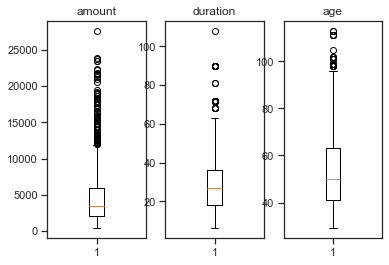

In [29]:
# Boxplots for continuous attributes
fig, axes = plt.subplots(nrows=1, ncols=3)
axes[0].boxplot(data['amount'])
axes[0].set_title('amount')
axes[1].boxplot(data['duration'])
axes[1].set_title('duration')
axes[2].boxplot(data['age'])
axes[2].set_title('age')

fig.savefig("boxplots.png")

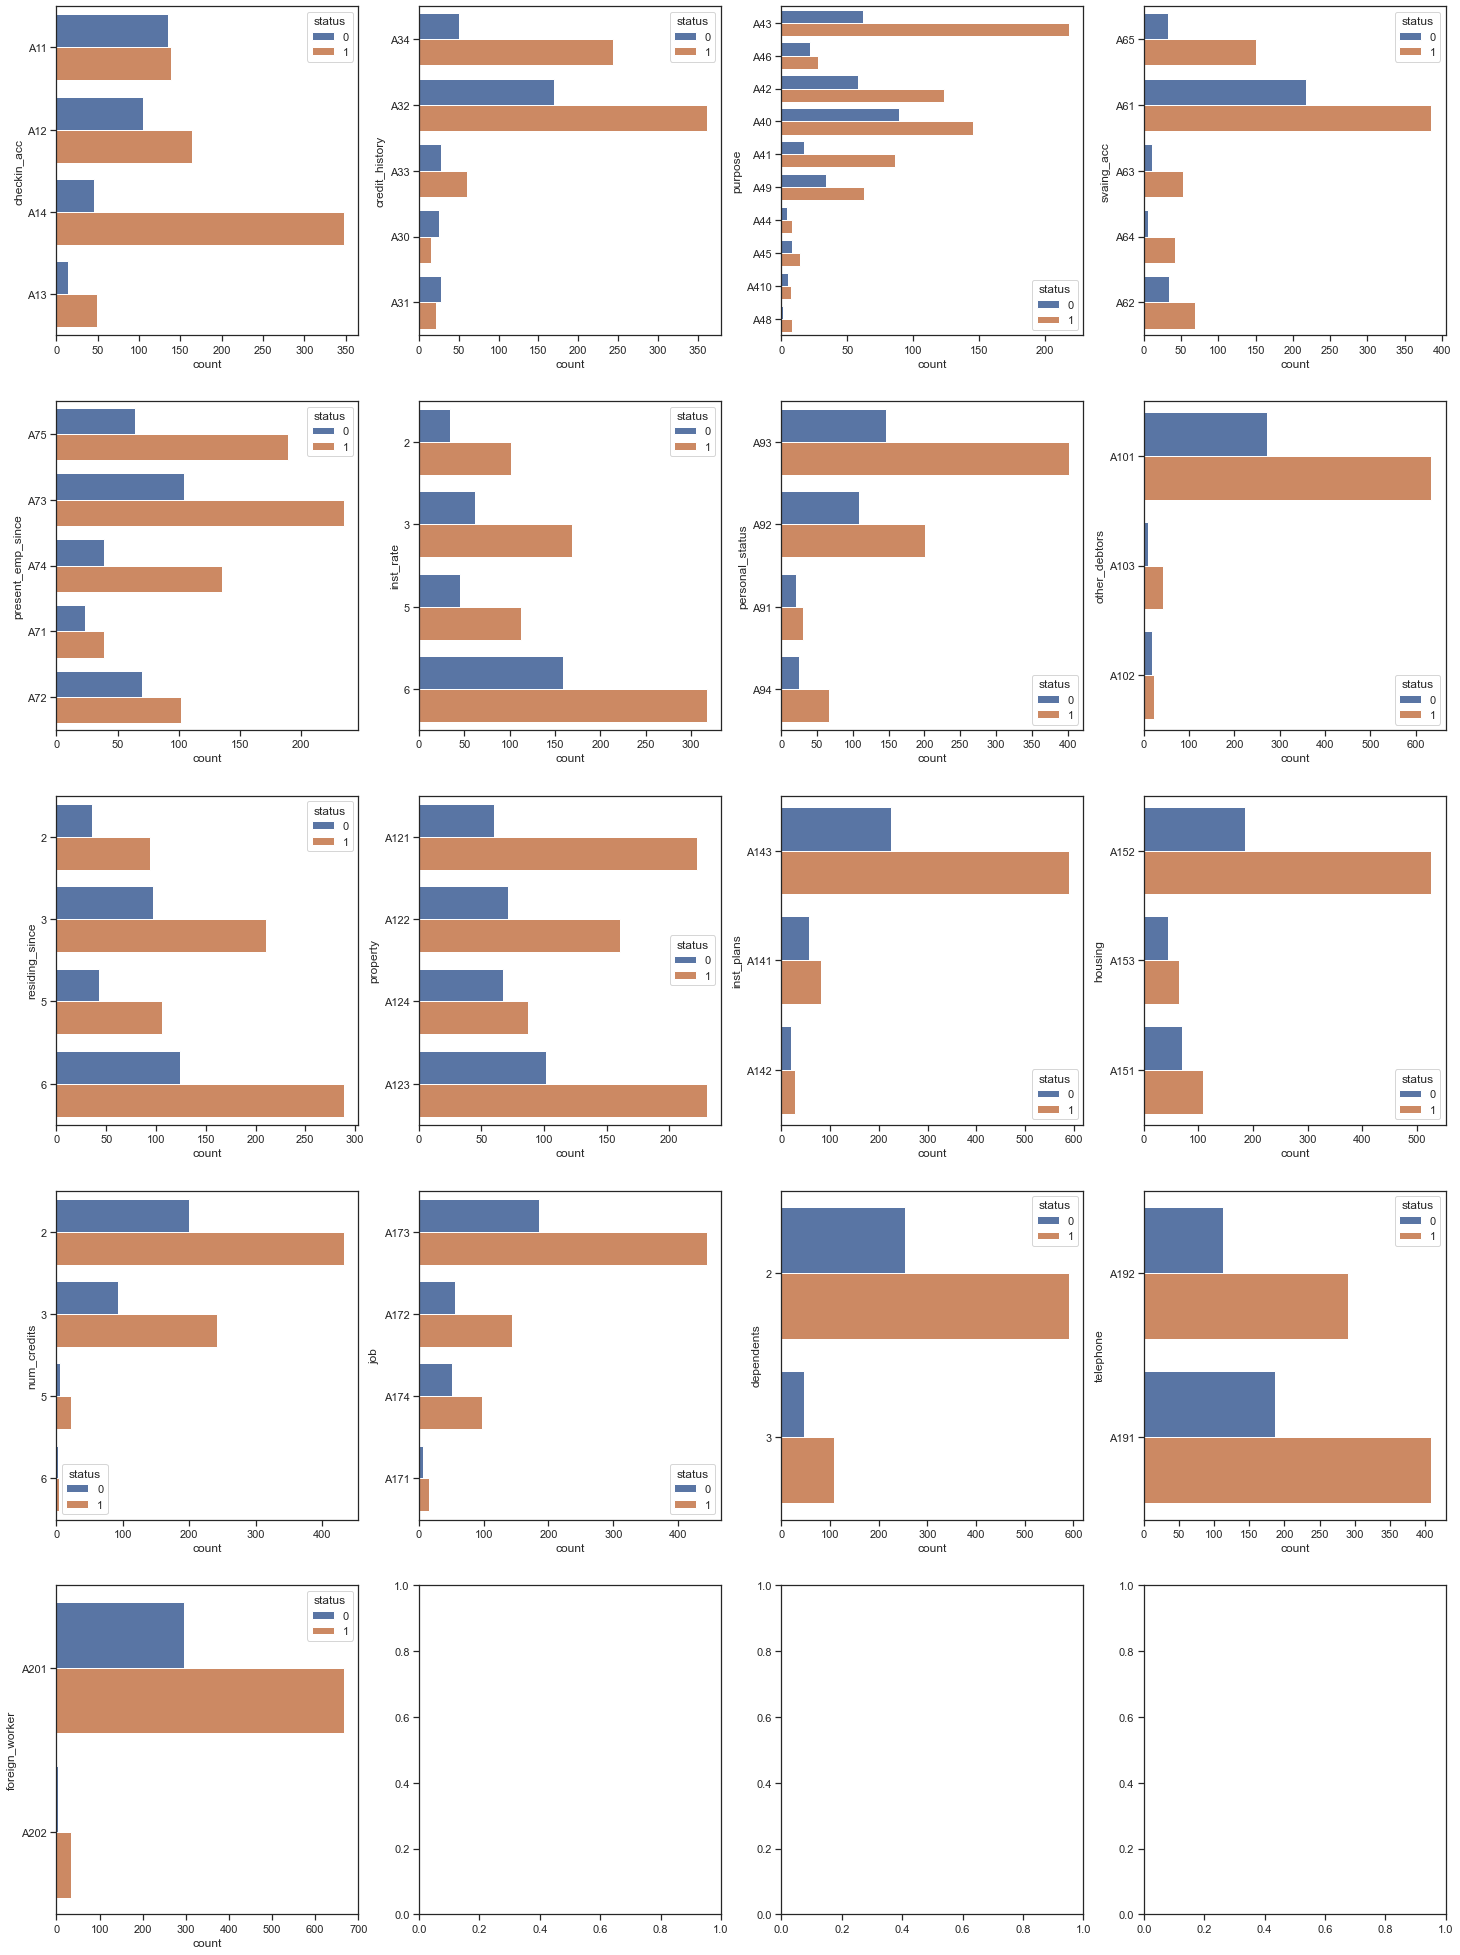

In [31]:
# Histograms for non-continuous attributes
f, axes = plt.subplots(5, 4,figsize=(8.3*3,11.7*3))
x=0
y=0
for column in data.drop(['status','amount','duration','age'], axis=1):
    sns.countplot(y=column, hue="status", data=data.drop(['amount','duration','age'],axis=1), ax=axes[x,y])
    y+=1
    if y>3:
        x+=1
        y=0
    if x>4:
        break
f.savefig("histograms5.png")

In [34]:
# Numerical features range of values
for x in range(len(numvars)):
    print(numvars[x],": ", data[numvars[x]].min()," - ",data[numvars[x]].max())

amount :  375  -  27636
duration :  6  -  108
inst_rate :  2  -  6
residing_since :  2  -  6
age :  29  -  113
num_credits :  2  -  6
dependents :  2  -  3
status :  0  -  1


In [36]:
# Standardization
numdata_std = pd.DataFrame(StandardScaler().fit_transform(data[numvars].drop(['status'], axis=1)))
# MinMax Rescaling to [0,1]
numdata_minmax = pd.DataFrame(MinMaxScaler().fit_transform(data[numvars].drop(['status'], axis=1)))
print("success")

success


Encoding categorical features

In [37]:
# Labelencoding to transform categorical to numerical
# Enables better Visualization than one hot encoding
d = defaultdict(LabelEncoder)

# Encoding the variable
lecatdata = data[catvars].apply(lambda x: d[x.name].fit_transform(x))

# print transformations
for x in range(len(catvars)):
    print(catvars[x],": ", data[catvars[x]].unique())
    print(catvars[x],": ", lecatdata[catvars[x]].unique())

checkin_acc :  ['A11' 'A12' 'A14' 'A13']
checkin_acc :  [0 1 3 2]
credit_history :  ['A34' 'A32' 'A33' 'A30' 'A31']
credit_history :  [4 2 3 0 1]
purpose :  ['A43' 'A46' 'A42' 'A40' 'A41' 'A49' 'A44' 'A45' 'A410' 'A48']
purpose :  [4 7 3 0 1 9 5 6 2 8]
svaing_acc :  ['A65' 'A61' 'A63' 'A64' 'A62']
svaing_acc :  [4 0 2 3 1]
present_emp_since :  ['A75' 'A73' 'A74' 'A71' 'A72']
present_emp_since :  [4 2 3 0 1]
personal_status :  ['A93' 'A92' 'A91' 'A94']
personal_status :  [2 1 0 3]
other_debtors :  ['A101' 'A103' 'A102']
other_debtors :  [0 2 1]
property :  ['A121' 'A122' 'A124' 'A123']
property :  [0 1 3 2]
inst_plans :  ['A143' 'A141' 'A142']
inst_plans :  [2 0 1]
housing :  ['A152' 'A153' 'A151']
housing :  [1 2 0]
job :  ['A173' 'A172' 'A174' 'A171']
job :  [2 1 3 0]
telephone :  ['A192' 'A191']
telephone :  [1 0]
foreign_worker :  ['A201' 'A202']
foreign_worker :  [0 1]


In [38]:
# One hot encoding
#create dummy variables for every category of every categorical variable
dummyvars = pd.get_dummies(data[catvars])

In [40]:
# append the dummy variable of the initial numerical variables numvars
data_clean = pd.concat([data[numvars], dummyvars], axis = 1)
data_std = pd.concat([numdata_std, data['status'], dummyvars], axis = 1)
data_minmax = pd.concat([numdata_minmax, data['status'], dummyvars], axis = 1)
print(data_clean.shape)
print(data_std.shape)
print(data_minmax.shape)

(1000, 62)
(1000, 62)
(1000, 62)


Split Data

In [41]:
# Unscaled, unnormalized data
X_clean = data_clean.drop('status', axis=1)
y_clean = data_clean['status']
X_train_clean, X_test_clean, y_train_clean, y_test_clean = train_test_split(X_clean,y_clean,test_size=0.3333, random_state=1)

# Standardized data
X_std = data_std.drop('status', axis=1)
y_std = data_std['status']
X_train_std, X_test_std, y_train_std, y_test_std = train_test_split(X_std,y_std,test_size=0.3333, random_state=1)

# Rescaled data
X_minmax = data_minmax.drop('status', axis=1)
y_minmax = data_minmax['status']
X_train_minmax, X_test_minmax, y_train_minmax, y_test_minmax = train_test_split(X_minmax,y_minmax,test_size=0.3333, random_state=1)

Handle imbalanced data
Use penalization in algorithms
Set algorithm class weights
Oversampling is done in data preprocessing

In [43]:
# Oversampling
# http://contrib.scikit-learn.org/imbalanced-learn/auto_examples/combine/plot_smote_enn.html#sphx-glr-auto-examples-combine-plot-smote-enn-py

# Apply SMOTE
sm = SMOTE(sampling_strategy='auto')
X_train_clean_res, y_train_clean_res = sm.fit_sample(X_train_clean, y_train_clean)
X_train_std_res, y_train_std_res = sm.fit_sample(X_train_std, y_train_std)
X_train_minmax_res, y_train_minmax_res = sm.fit_sample(X_train_minmax, y_train_minmax)

# Print number of 'good' credits and 'bad credits, should be fairly balanced now
print("Before/After clean")
unique, counts = np.unique(y_train_clean, return_counts=True)
print(dict(zip(unique, counts)))
unique, counts = np.unique(y_train_clean_res, return_counts=True)
print(dict(zip(unique, counts)))
print("Before/After std")
unique, counts = np.unique(y_train_std, return_counts=True)
print(dict(zip(unique, counts)))
unique, counts = np.unique(y_train_std_res, return_counts=True)
print(dict(zip(unique, counts)))
print("Before/After minmax")
unique, counts = np.unique(y_train_minmax, return_counts=True)
print(dict(zip(unique, counts)))
unique, counts = np.unique(y_train_minmax_res, return_counts=True)
print(dict(zip(unique, counts)))

Before/After clean
{0: 208, 1: 458}
{0: 458, 1: 458}
Before/After std
{0: 208, 1: 458}
{0: 458, 1: 458}
Before/After minmax
{0: 208, 1: 458}
{0: 458, 1: 458}


Classification to evaluate data transformation

In [44]:
# Dummy Classifier
print("DummyClassifier")
dclf = DummyClassifier(strategy='stratified').fit(X_train_clean, y_train_clean)

# Predict target variables y for test data
y_pred = dclf.predict(X_test_clean)

# Get Cross Validation and Confusion matrix
get_eval(dclf, X_train_clean, y_train_clean,y_test_clean,y_pred)

DummyClassifier
Cross Validation Accuracy: 0.58 (+/- 0.06)
Cross Validation Precision: 0.70 (+/- 0.05)
Cross Validation roc_auc: 0.55 (+/- 0.06)
[[ 25  67]
 [ 75 167]]


In [45]:
# Decisiontree
# Train, test and evaluate the classifiers with different preprocessed data
print("clean resampled")
dectreeclf(X_train_clean_res, y_train_clean_res,X_test_clean, y_test_clean)

clean resampled
DecisionTreeClassifier
Cross Validation Accuracy: 0.78 (+/- 0.11)
Cross Validation Precision: 0.81 (+/- 0.16)
Cross Validation roc_auc: 0.84 (+/- 0.11)
[[ 42  50]
 [ 57 185]]


In [50]:
# Logistic Regression
print("clean resampled")
logregclf(X_train_clean_res, y_train_clean_res,X_test_clean, y_test_clean)

clean resampled
LogisticRegression
Cross Validation Accuracy: 0.79 (+/- 0.10)
Cross Validation Precision: 0.81 (+/- 0.14)
Cross Validation roc_auc: 0.87 (+/- 0.11)
[[ 48  44]
 [ 48 194]]


In [47]:
# Linear SVC with weighted classes (balanced)
print("std resampled")
linearsvmclf(X_train_std_res, y_train_std_res,X_test_std, y_test_std,2)

std resampled
LinearSVC
Cross Validation Accuracy: 0.80 (+/- 0.12)
Cross Validation Precision: 0.82 (+/- 0.17)
Cross Validation roc_auc: 0.89 (+/- 0.11)
[[ 43  49]
 [ 34 208]]


In [48]:
# SVC with weighted classes (balanced)
print('minmax resampled')
svmclf(X_train_minmax_res,y_train_minmax_res,X_test_minmax,y_test_minmax,2)

minmax resampled
SVC
Cross Validation Accuracy: 0.80 (+/- 0.11)
Cross Validation Precision: 0.82 (+/- 0.16)
Cross Validation roc_auc: 0.88 (+/- 0.11)
[[ 43  49]
 [ 35 207]]


In [51]:
# Gaussian Naive Bayes
# Train, test and evaluate the classifiers with different preprocessed data
print("clean resampled")
gaussnbclf(X_train_clean_res, y_train_clean_res,X_test_clean, y_test_clean)

clean resampled
GaussianNB
Cross Validation Accuracy: 0.79 (+/- 0.10)
Cross Validation Precision: 0.85 (+/- 0.16)
Cross Validation roc_auc: 0.87 (+/- 0.11)
[[ 47  45]
 [ 55 187]]


Data Reduction

In [52]:
# Save Correlation Matrix of every variable
data_clean.corr(method='pearson').to_csv("data_corr.csv")

# List highly correlated features
c = data_clean.corr()
# Pivots the row/class labels with respective values: matrix -> list
s = c.stack()
# Select and sort (descending) all pairs with correlation values 0.5<x<1 or -1<x<-0.5
so = s[(0.5<s) & (s<1) | (-1<s) & (s<-0.5)].sort_values(ascending=False, kind='quicksort')
print(so)

housing_A153         property_A124          0.779853
property_A124        housing_A153           0.779853
amount               duration               0.625128
duration             amount                 0.625128
job_A173             job_A174              -0.543852
job_A174             job_A173              -0.543852
housing_A152         housing_A153          -0.548445
housing_A153         housing_A152          -0.548445
svaing_acc_A61       svaing_acc_A65        -0.583281
svaing_acc_A65       svaing_acc_A61        -0.583281
other_debtors_A102   other_debtors_A101    -0.645721
other_debtors_A101   other_debtors_A102    -0.645721
job_A172             job_A173              -0.652438
job_A173             job_A172              -0.652438
credit_history_A34   credit_history_A32    -0.683617
credit_history_A32   credit_history_A34    -0.683617
other_debtors_A101   other_debtors_A103    -0.731408
other_debtors_A103   other_debtors_A101    -0.731408
housing_A152         housing_A151          -0.

In [53]:
# SelectKBest
# Use rescaled data, as data must be non-negative
skb = SelectKBest(chi2, k=50)
skb.fit(X_train_minmax_res, y_train_minmax_res)

# Apply fitted transformation to datasets
SKBX_train = skb.transform(X_train_clean_res)
SKBX_test = skb.transform(X_test_clean)
SKBy_train = y_train_minmax_res
SKBy_test = y_test_minmax


In [54]:
# Recursive feature elimination (RFE)
# Use clean data, as logistic regression should be robust do different feature scales
rfe = RFE(LogisticRegression(), 50)
fit = rfe.fit(X_train_clean_res, y_train_clean_res)
print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

# Apply fitted transformation to datasets
RFEX_train = rfe.transform(X_train_clean_res)
RFEX_test = rfe.transform(X_test_clean)
RFEy_train = y_train_clean_res
RFEy_test = y_test_clean

Num Features: 50
Selected Features: [False False  True False False  True False  True  True  True  True  True
  True  True  True  True False  True  True  True  True  True False False
  True False False  True False  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True]
Feature Ranking: [12  9  1  8 10  1  5  1  1  1  1  1  1  1  1  1  7  1  1  1  1  1 11  4
  1  6  3  1  2  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1]


In [55]:
# Bagged Decision Trees like Random Forest and Extra Tree to determine feature importance
# Use clean data, unstandardized and unscaled, because tree is robust to different scales
etcclf = ExtraTreesClassifier().fit(X_train_clean_res, y_train_clean_res)
    
# Select important features using sklearn SelectFromModel, vary treshold, good value turns out to be mean -> select overaverage important features
sfm = SelectFromModel(etcclf, prefit=True, threshold=0.01)

# Apply fitted transformation to datasets
SFMETCX_train = sfm.transform(X_train_clean_res)
SFMETCX_test = sfm.transform(X_test_clean)
SFMETCy_train = y_train_clean_res
SFMETCy_test = y_test_clean

# Print shape to see how many features have been selected
print(SFMETCX_train.shape)

# Calculate the feature ranking - Top50 
importances = etcclf.feature_importances_ 
std = np.std([etcclf.feature_importances_ for tree in etcclf.estimators_], axis=0) 
indices = np.argsort(importances)[::-1] 
print("Top 50 Features:") 
for f in range(50): 
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

(916, 42)
Top 50 Features:
1. feature 10 (0.117242)
2. feature 15 (0.056958)
3. feature 1 (0.033881)
4. feature 0 (0.032834)
5. feature 43 (0.031230)
6. feature 4 (0.027558)
7. feature 30 (0.026101)
8. feature 2 (0.025996)
9. feature 51 (0.025814)
10. feature 38 (0.025344)
11. feature 3 (0.024549)
12. feature 49 (0.023461)
13. feature 13 (0.021544)
14. feature 20 (0.021124)
15. feature 37 (0.019646)
16. feature 8 (0.018733)
17. feature 33 (0.018580)
18. feature 17 (0.017423)
19. feature 9 (0.017207)
20. feature 58 (0.017073)
21. feature 5 (0.016524)
22. feature 7 (0.016414)
23. feature 45 (0.016224)
24. feature 34 (0.015921)
25. feature 26 (0.015894)
26. feature 35 (0.015782)
27. feature 55 (0.015619)
28. feature 19 (0.015618)
29. feature 44 (0.014922)
30. feature 47 (0.014246)
31. feature 16 (0.014020)
32. feature 57 (0.013197)
33. feature 29 (0.013015)
34. feature 39 (0.012481)
35. feature 14 (0.011838)
36. feature 56 (0.011826)
37. feature 40 (0.011646)
38. feature 50 (0.011514)
39.

In [56]:
# Principal Component Analysis
# Here we use standardized data, to not overestimate the influence of single variables, which results from different scaling
pca = PCA(n_components=10)
pca.fit_transform(X_train_std_res, y_train_std_res)
print(pca.explained_variance_ratio_) 

# Apply fitted transformation to datasets
PCAX_train = pca.transform(X_train_clean_res)
PCAX_test = pca.transform(X_test_clean)
PCAy_train = y_train_std_res
PCAy_test = y_test_std

[0.15069455 0.11528388 0.08232911 0.07120162 0.06538605 0.05617679
 0.03570551 0.0305655  0.02563747 0.02446419]


Classification to evaluate data reduction

In [57]:
# Logistic Regression
# clean res data and different data reduction
print("without reduction")
logregclf(X_train_clean_res, y_train_clean_res,X_test_clean, y_test_clean)
print("SKB")
logregclf(SKBX_train, SKBy_train, SKBX_test, SKBy_test)
print("RFE")
logregclf(RFEX_train, RFEy_train, RFEX_test, RFEy_test)
print("SFMETC")
logregclf(SFMETCX_train, SFMETCy_train, SFMETCX_test, SFMETCy_test)
print("PCA")
logregclf(PCAX_train, PCAy_train, PCAX_test, PCAy_test)

without reduction
LogisticRegression
Cross Validation Accuracy: 0.79 (+/- 0.10)
Cross Validation Precision: 0.81 (+/- 0.14)
Cross Validation roc_auc: 0.87 (+/- 0.11)
[[ 48  44]
 [ 48 194]]
SKB
LogisticRegression
Cross Validation Accuracy: 0.80 (+/- 0.10)
Cross Validation Precision: 0.82 (+/- 0.15)
Cross Validation roc_auc: 0.89 (+/- 0.09)
[[ 52  40]
 [ 42 200]]
RFE
LogisticRegression
Cross Validation Accuracy: 0.81 (+/- 0.14)
Cross Validation Precision: 0.83 (+/- 0.18)
Cross Validation roc_auc: 0.88 (+/- 0.12)
[[ 34  58]
 [ 31 211]]
SFMETC
LogisticRegression
Cross Validation Accuracy: 0.78 (+/- 0.11)
Cross Validation Precision: 0.80 (+/- 0.15)
Cross Validation roc_auc: 0.87 (+/- 0.11)
[[ 51  41]
 [ 36 206]]
PCA
LogisticRegression
Cross Validation Accuracy: 0.73 (+/- 0.05)
Cross Validation Precision: 0.74 (+/- 0.05)
Cross Validation roc_auc: 0.79 (+/- 0.07)
[[ 61  31]
 [ 66 176]]


In [58]:
#Gaussian Naive Bayes
# clean res data and different data reduction
print("without reduction")
gaussnbclf(X_train_clean_res, y_train_clean_res,X_test_clean, y_test_clean)
print("SKB")
gaussnbclf(SKBX_train, SKBy_train, SKBX_test, SKBy_test)
print("RFE")
gaussnbclf(RFEX_train, RFEy_train, RFEX_test, RFEy_test)
print("SFMETC")
gaussnbclf(SFMETCX_train, SFMETCy_train, SFMETCX_test, SFMETCy_test)
print("PCA")
gaussnbclf(PCAX_train, PCAy_train, PCAX_test, PCAy_test)

without reduction
GaussianNB
Cross Validation Accuracy: 0.79 (+/- 0.10)
Cross Validation Precision: 0.85 (+/- 0.16)
Cross Validation roc_auc: 0.87 (+/- 0.11)
[[ 47  45]
 [ 55 187]]
SKB
GaussianNB
Cross Validation Accuracy: 0.80 (+/- 0.09)
Cross Validation Precision: 0.86 (+/- 0.15)
Cross Validation roc_auc: 0.88 (+/- 0.10)
[[ 49  43]
 [ 63 179]]
RFE
GaussianNB
Cross Validation Accuracy: 0.76 (+/- 0.10)
Cross Validation Precision: 0.81 (+/- 0.15)
Cross Validation roc_auc: 0.84 (+/- 0.12)
[[ 48  44]
 [ 70 172]]
SFMETC
GaussianNB
Cross Validation Accuracy: 0.81 (+/- 0.11)
Cross Validation Precision: 0.84 (+/- 0.16)
Cross Validation roc_auc: 0.88 (+/- 0.10)
[[ 48  44]
 [ 44 198]]
PCA
GaussianNB
Cross Validation Accuracy: 0.53 (+/- 0.03)
Cross Validation Precision: 0.52 (+/- 0.02)
Cross Validation roc_auc: 0.55 (+/- 0.05)
[[ 26  66]
 [ 39 203]]


In [59]:
# SVC with weighted classes (balanced)
# minmax res data and different data reduction
print('without reduction')
svmclf(X_train_minmax_res,y_train_minmax_res,X_test_minmax,y_test_minmax,2)
print("SKB")
#svmclf(SKBX_train, SKBy_train, SKBX_test, SKBy_test,2)
print("RFE")
#svmclf(RFEX_train, RFEy_train, RFEX_test, RFEy_test,2)
print("SFMETC")
#svmclf(SFMETCX_train, SFMETCy_train, SFMETCX_test, SFMETCy_test,2)
print("PCA")
#svmclf(PCAX_train, PCAy_train, PCAX_test, PCAy_test,2)

without reduction
SVC
Cross Validation Accuracy: 0.80 (+/- 0.11)
Cross Validation Precision: 0.82 (+/- 0.16)
Cross Validation roc_auc: 0.88 (+/- 0.11)
[[ 43  49]
 [ 35 207]]
SKB
RFE
SFMETC
PCA


In [60]:
# Linear SVC with weighted classes (balanced)
print("without reduction")
linearsvmclf(X_train_std_res, y_train_std_res,X_test_std, y_test_std,2)
print("SKB")
linearsvmclf(SKBX_train, SKBy_train, SKBX_test, SKBy_test,2)
print("RFE")
linearsvmclf(RFEX_train, RFEy_train, RFEX_test, RFEy_test,2)
print("SFMETC")
linearsvmclf(SFMETCX_train, SFMETCy_train, SFMETCX_test, SFMETCy_test,2)
print("PCA")
linearsvmclf(PCAX_train, PCAy_train, PCAX_test, PCAy_test,2)

without reduction
LinearSVC
Cross Validation Accuracy: 0.80 (+/- 0.12)
Cross Validation Precision: 0.82 (+/- 0.17)
Cross Validation roc_auc: 0.89 (+/- 0.11)
[[ 43  49]
 [ 34 208]]
SKB
LinearSVC
Cross Validation Accuracy: 0.81 (+/- 0.12)
Cross Validation Precision: 0.83 (+/- 0.17)
Cross Validation roc_auc: 0.90 (+/- 0.11)
[[ 40  52]
 [ 36 206]]
RFE
LinearSVC
Cross Validation Accuracy: 0.81 (+/- 0.14)
Cross Validation Precision: 0.82 (+/- 0.18)
Cross Validation roc_auc: 0.88 (+/- 0.13)
[[ 31  61]
 [ 29 213]]
SFMETC
LinearSVC
Cross Validation Accuracy: 0.80 (+/- 0.12)
Cross Validation Precision: 0.82 (+/- 0.17)
Cross Validation roc_auc: 0.89 (+/- 0.11)
[[ 46  46]
 [ 37 205]]
PCA
LinearSVC
Cross Validation Accuracy: 0.72 (+/- 0.06)
Cross Validation Precision: 0.73 (+/- 0.05)
Cross Validation roc_auc: 0.80 (+/- 0.07)
[[ 61  31]
 [ 68 174]]


Increasing Accuracy
Use bagging and boosting: RandomForestClassifier, ExtraTreesClassifier
SVC, Grid Search Parameter Optimization
Multilayer Perceptron Classifier
Gradient Booster Classifier
AdaBoost
BaggingClassifier
SGDClassifier
VotingClassifier (Look where algorithms have their strengths - then combine e.g. good algo for tp with good algo for tp

In [61]:
# Random Forest
# Choose clean data, as tree is robust
randomforestclf(X_train_clean_res, y_train_clean_res,X_test_clean, y_test_clean)

RandomForestClassifier
Cross Validation Accuracy: 0.82 (+/- 0.11)
Cross Validation Precision: 0.83 (+/- 0.16)
Cross Validation roc_auc: 0.91 (+/- 0.09)
[[ 42  50]
 [ 30 212]]


In [62]:
# Extra Trees
# Choose clean data, as tree is robust
extratreesclf(X_train_clean_res, y_train_clean_res,X_test_clean, y_test_clean)

ExtraTreesClassifier
Cross Validation Accuracy: 0.82 (+/- 0.11)
Cross Validation Precision: 0.84 (+/- 0.16)
Cross Validation roc_auc: 0.91 (+/- 0.09)
[[ 39  53]
 [ 30 212]]


In [63]:
# AdaBoostClassifier
# Choose clean data, as tree is robust
adaboostclf(X_train_clean_res, y_train_clean_res,X_test_clean, y_test_clean)

AdaBoostClassifier
Cross Validation Accuracy: 0.81 (+/- 0.11)
Cross Validation Precision: 0.83 (+/- 0.16)
Cross Validation roc_auc: 0.89 (+/- 0.11)
[[ 41  51]
 [ 33 209]]


In [64]:
# BaggingClassifier
baggingclf(X_train_minmax_res, y_train_minmax_res, X_test_minmax, y_test_minmax)

BaggingClassifier
Cross Validation Accuracy: 0.80 (+/- 0.09)
Cross Validation Precision: 0.84 (+/- 0.13)
Cross Validation roc_auc: 0.88 (+/- 0.10)
[[ 38  54]
 [ 59 183]]


In [65]:
# GradientBoostingClassifier
# Choose clean data, as tree is robust
gradientboostingclf(X_train_clean_res, y_train_clean_res,X_test_clean, y_test_clean)

GradientBoostingClassifier
Cross Validation Accuracy: 0.82 (+/- 0.10)
Cross Validation Precision: 0.85 (+/- 0.15)
Cross Validation roc_auc: 0.90 (+/- 0.10)
[[ 39  53]
 [ 38 204]]


In [66]:
# Multi-layer Perceptron classifier (MLP)
mlpclf(X_train_minmax, y_train_minmax, X_test_minmax, y_test_minmax)

MLPClassifier
<bound method BaseEstimator.get_params of MLPClassifier(alpha=5, hidden_layer_sizes=(75, 75), solver='lbfgs')>
Cross Validation Accuracy: 0.72 (+/- 0.06)
Cross Validation Precision: 0.79 (+/- 0.04)
Cross Validation roc_auc: 0.76 (+/- 0.06)
[[ 45  47]
 [ 52 190]]


In [67]:

# SGDClassifier (Logistic Regression and SVC)
sgdclf(X_train_minmax, y_train_minmax, X_test_minmax, y_test_minmax)

SGDClassifier
Cross Validation Accuracy: 0.71 (+/- 0.07)
Cross Validation Precision: 0.78 (+/- 0.06)
Cross Validation roc_auc: 0.76 (+/- 0.07)
[[ 77  15]
 [128 114]]
